<center><h1>Laboratorio 2</h1></center>
<center><h2>Tema: Series con estacionalidad</h2></center>
<br>

## Consignas
1. Levantar los datos desde el archivo `dataset/demanda.csv`. Los mismos fueron extraídos de los datos del informe mensual en http://portalweb.cammesa.com/memnet1/Pages/descargas.aspx
2. Explorar los datos y visualizar descomposición de datos
3. Modelar con Holt Winters Smoothing con diferentes parámetros
4. Visualizar los resultados y evaluar su poder predictivo, comparando ambos modelos

## Ejecución
La ejecución de este notebook se realizó en Colab.



## 1. Importar datos y librerías

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
DATA_FILE = 'datasets/demanda.csv'
RAW_REPO = 'https://github.com/DiploDatos/AnalisisSeriesTemporales/raw/master/'
if IN_COLAB:
    DATA_FILE = RAW_REPO + DATA_FILE
    !wget -O get-x13as.sh {RAW_REPO + 'get-x13as.sh'}
    !sh get-x13as.sh
    !wget -O plotting.py {RAW_REPO + 'plotting.py'}

--2019-10-02 02:28:10--  https://github.com/DiploDatos/AnalisisSeriesTemporales/raw/master/get-x13as.sh
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DiploDatos/AnalisisSeriesTemporales/master/get-x13as.sh [following]
--2019-10-02 02:28:10--  https://raw.githubusercontent.com/DiploDatos/AnalisisSeriesTemporales/master/get-x13as.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236 [text/plain]
Saving to: ‘get-x13as.sh’

get-x13as.sh        100%[===================>]     236  --.-KB/s    in 0s      

2019-10-02 02:28:10 (42.0 MB/s) - ‘get-x13as.sh’ saved [236/236]

--2019-10-02 02:28:12--  https://

In [0]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [0]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

In [0]:
data = pd.read_csv(DATA_FILE, index_col='TIPO', parse_dates=True, dayfirst=True)
data.index.names = ['Periodo']


y = data['TOTAL'].copy()
y.index = y.index.to_period(freq='M')

ts = data['TOTAL']

## 2. Explorar y visualizar descomposición de datos

In [5]:
data.tail()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
Periodo,,,,
2019-03-01,4004709.444,3044854.983,3072063.284,1.012163e+07
2019-04-01,3652724.519,2892482.731,3029687.889,9.574895e+06
2019-05-01,4356836.823,2973830.213,3055527.035,1.038619e+07
2019-06-01,4816838.191,2937048.667,2897618.673,1.065151e+07
2019-07-01,5704951.016,3288949.873,3035538.422,1.202944e+07


In [6]:
data.describe().round(2)

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
count,79.00,79.00,79.00,79.00
mean,4551935.29,3113096.42,3187977.02,10853008.74
std,654164.93,206829.98,124659.74,816874.81
min,3239380.70,2809183.13,2897618.67,9307334.16
25%,3990580.45,2948084.14,3109179.19,10223259.40
50%,4470715.12,3070853.24,3199317.20,10706955.32
75%,5092450.46,3270751.91,3275571.56,11476364.98
max,6193110.21,3606989.07,3460879.97,12607552.72


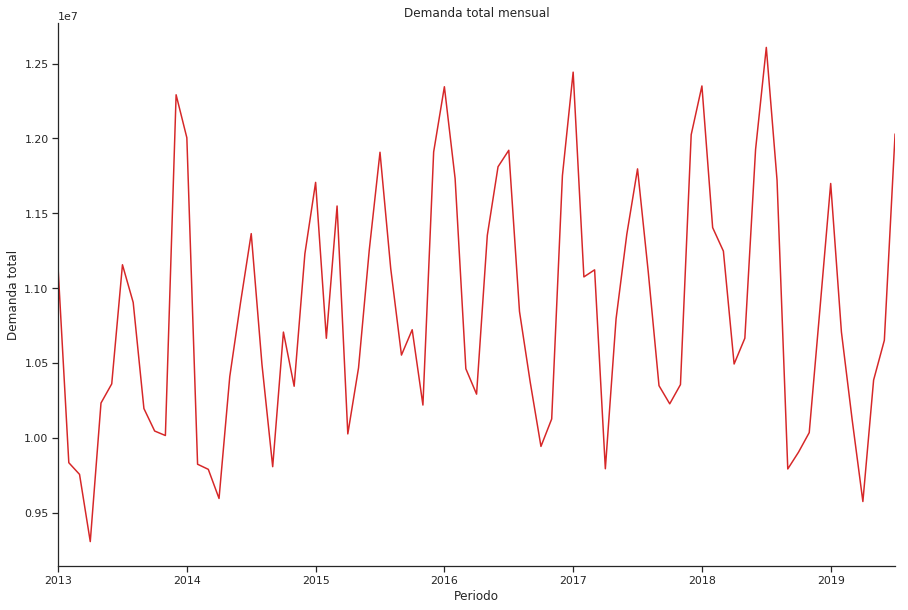

In [7]:
fig, ax= plt.subplots()
y.plot(color=red)
ax.set_xlabel('Periodo')
ax.set_ylabel('Demanda total')
ax.set_title('Demanda total mensual')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

In [8]:
data_summary = f"""Periodo mínimo: {data.index.min()} 
Periodo máximo: {data.index.max()}
Demanda mínima: {data.TOTAL.min()}
Demanda media: {data.TOTAL.mean()}
Demanda máxima: {data.TOTAL.max()}"""
print(data_summary)

Periodo mínimo: 2013-01-01 00:00:00 
Periodo máximo: 2019-07-01 00:00:00
Demanda mínima: 9307334.163
Demanda media: 10853008.735658228
Demanda máxima: 12607552.722


In [9]:
decomposition = sm.tsa.x13_arima_analysis(ts,x12path='.')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


In [10]:
[attr for attr in dir(decomposition) if not attr.startswith('_')]

['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

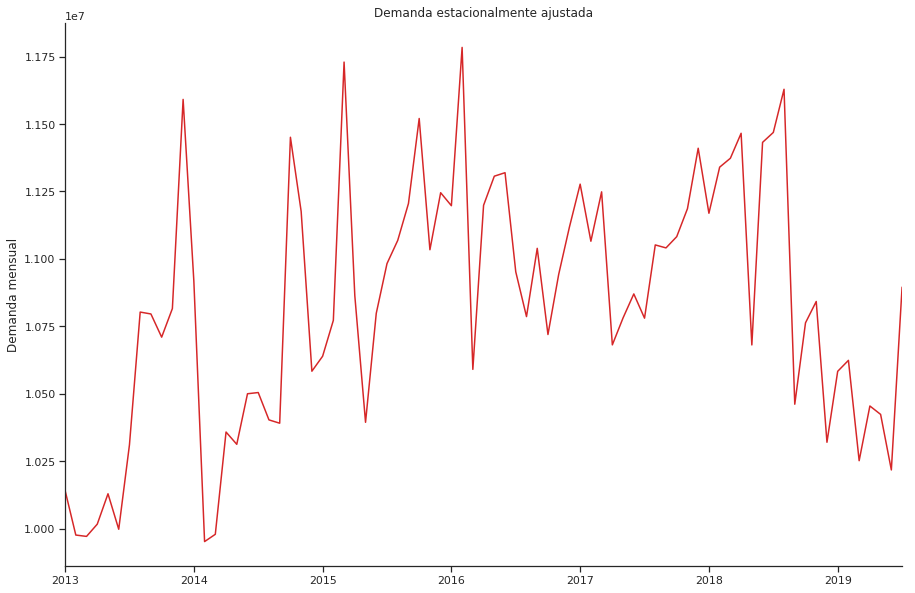

In [11]:
fig, ax= plt.subplots()
decomposition.seasadj.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Demanda mensual')
ax.set_title('Demanda estacionalmente ajustada')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

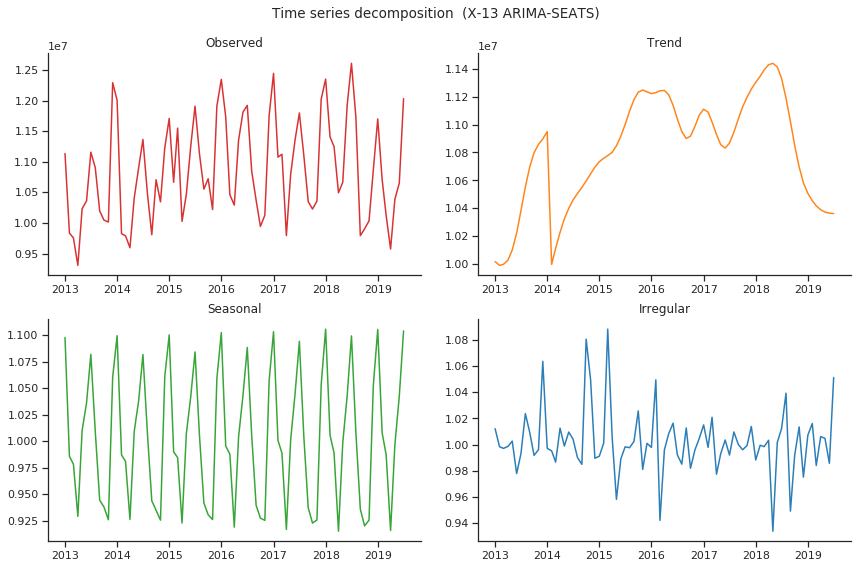

In [12]:
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

Se puede observar que la demanda:
  * no presenta una tendencia constante
  * presenta una marcada estacionalidad
  * presenta una gran componente de ruido o irregularidad

In [0]:
# saving decomposition results
f=open('x13results.txt', mode='w+')
f.write(decomposition.results)
f.close()

## 3. Modelar con Holt Winters Smoothing con diferentes parámetros

Se implementarán los modelos:
* Additive Holt Winters (trend=add, damped=False,  seasonal=add)
* Multiplicative Holt Winters  (trend=add, damped=False, seasonal=mul)
* Multiplicative Holt Winters with Damped Trend (trend=add, damped=True, seasonal=mul)

In [0]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [15]:
ahw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, 
                                   seasonal='add', seasonal_periods=12).fit()
hw_summary(ahw_sm)

 In-sample fit:
 RMSE               471015.014


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,17526556334113.439
Optimized:,True,AIC,2095.898
Trend:,Additive,BIC,2133.809
Seasonal:,Additive,AICC,2107.298
Seasonal Periods:,12,Date:,"Wed, 02 Oct 2019"
Box-Cox:,False,Time:,02:28:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1667932,alpha,True
smoothing_slope,4.611e-09,beta,True


In [16]:
mhw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_sm)

 In-sample fit:
 RMSE               373386.184


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,11013962177297.572
Optimized:,True,AIC,2059.198
Trend:,Additive,BIC,2097.109
Seasonal:,Multiplicative,AICC,2070.598
Seasonal Periods:,12,Date:,"Wed, 02 Oct 2019"
Box-Cox:,False,Time:,02:28:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3555951,alpha,True
smoothing_slope,2.2473e-13,beta,True


In [17]:
mhw_damped=sm.tsa.ExponentialSmoothing(y, trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_damped)

 In-sample fit:
 RMSE               373992.563


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,11049764539979.836
Optimized:,True,AIC,2061.455
Trend:,Additive,BIC,2101.735
Seasonal:,Multiplicative,AICC,2074.336
Seasonal Periods:,12,Date:,"Wed, 02 Oct 2019"
Box-Cox:,False,Time:,02:28:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3601600,alpha,True
smoothing_slope,0.0526473,beta,True


Considerando el RMSE del dample de fit, el modelo que mejores resultados obtuvo es el **Multiplicative Holt Winters**. De todas maneras, cabe destacar que el error es grande.

## 4. Visualizar los resultados y evaluar su poder predictivo, comparando modelos

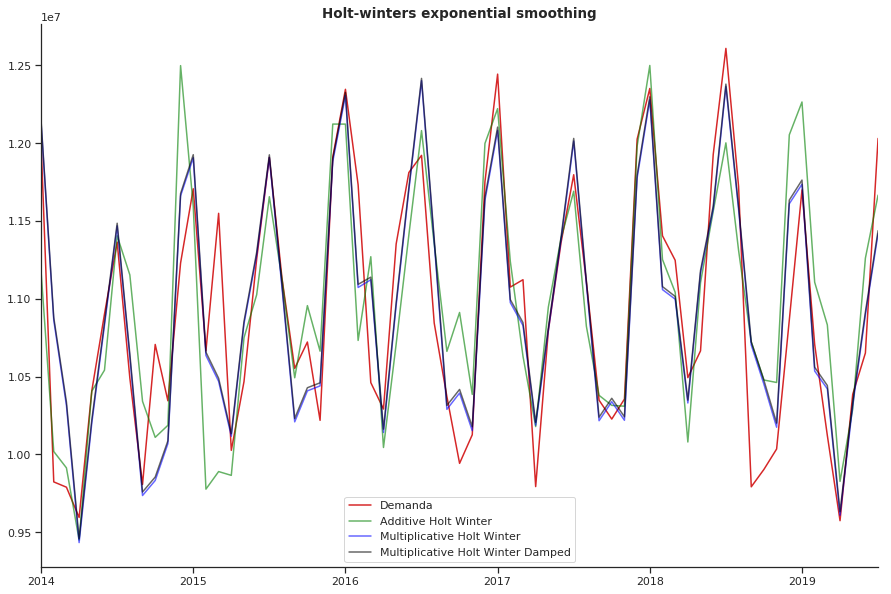

In [18]:
smoothed_ahw_sm=pd.Series(ahw_sm.fittedvalues, index=y.index)
smoothed_mhw_damped=pd.Series(mhw_damped.fittedvalues, index=y.index)
smoothed_mhw_sm=pd.Series(mhw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots()

y['2014':].plot(color='#D62728', label='Demanda')
smoothed_ahw_sm['2014':].plot(color='green', label='Additive Holt Winter', alpha=0.6)
smoothed_mhw_damped['2014':].plot(color='blue', label='Multiplicative Holt Winter', alpha=0.6)
smoothed_mhw_sm['2014':].plot(color='black', label='Multiplicative Holt Winter Damped', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

### Comparación mediante residuos

Para complementar los resultados obtenidos de la sección anterios, en donde se calculó el RSME y SE de cada uno de los modelos, se visualizan los residuos de de los mismos esperando obtener las mismas conclusiones.

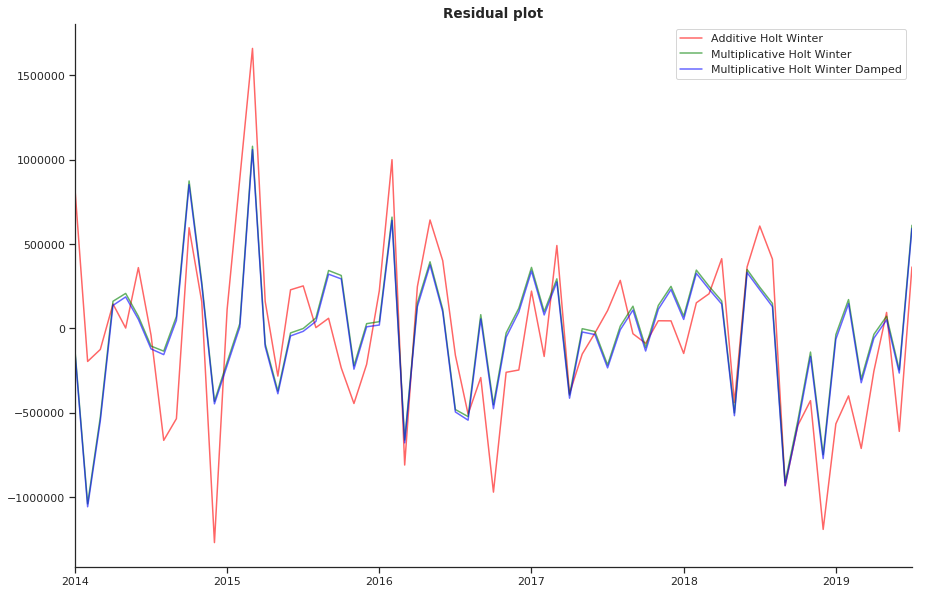

In [19]:
resid_awh_sw = (y-ahw_sm.fittedvalues)[12:]# we remove the first 12 observations as they are for initialisitation only
resid_mhw_damped = (y-mhw_damped.fittedvalues)[12:]
resid_mh_sw = (y-mhw_sm.fittedvalues)[12:]

fig, ax= plt.subplots()
resid_awh_sw.plot(color='red', label='Additive Holt Winter', alpha=0.6)
resid_mhw_damped.plot(color='green', label='Multiplicative Holt Winter', alpha=0.6)
resid_mh_sw.plot(color='blue', label='Multiplicative Holt Winter Damped', alpha=0.6)

plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title(r'Residual plot', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

Del gráfico anterior se puede observar que el que mayor residuos tiene es el modelo Additive Holt Winters y que los modelos Multiplicative Holt Winters (con y sin damped) no se tienen grandes diferencias.

### Comparación mediante forecasting

Se realiza la comparación de los diferentes parámetros en base a los resultados de RMSE y SE a partir del forecasting.



In [20]:
start_val = y.index[-round(len(y)/12*.2)*12]
start_val

Period('2018-08', 'M')

In [0]:
# Real time forecasting 

validation=y[start_val:].index
start = y.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    

columns=['Seasonal RW', 'Additive Holt Winters', 'Multiplicative Holt Winters', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

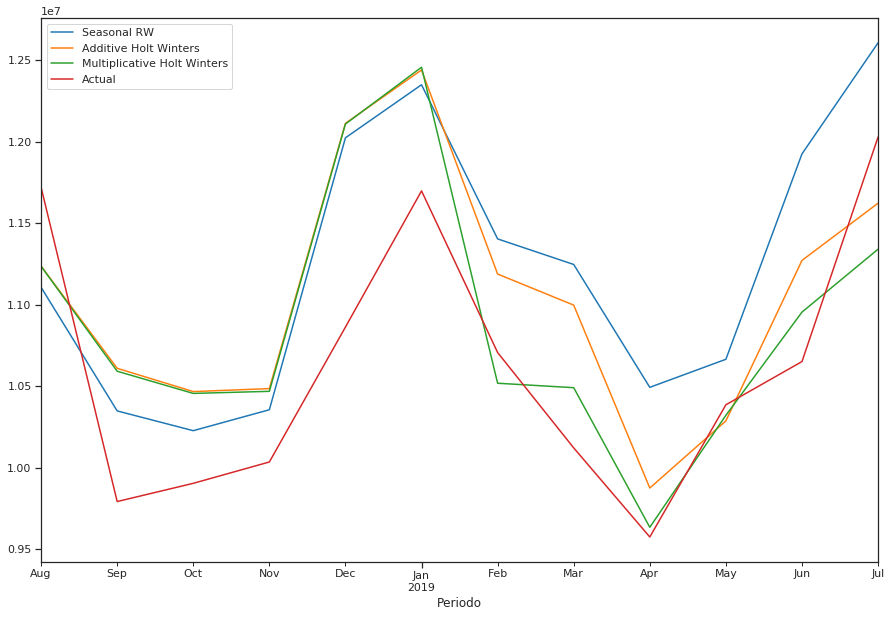

In [22]:
results.plot();

Se puede observar que el modelo Multiplicative Holt Winters es el que más se acerca a la variable real, aunque que no presenta una mejoría relevante respecto a los demás modelos.

In [23]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
Seasonal RW,779964.344,148054.667
Additive Holt Winters,657481.478,150961.652
Multiplicative Holt Winters,594538.757,161497.230


Analizando los resultados obtenidos, se concluye que el mejor modelo es el Multiplicative Holt Winters, ya que es el que tiene menor RSME. Aunque en el error estándar (SE) este modelo es el que peores resultados tiene, se decide priorizar el RMSE ya que este error, en teoría, es más adecuado para su uso en las muestras y SE, por su parte, es adecuado para las poblaciones.
